# Load dataset

In [ ]:
import pandas as pd

df = pd.read_csv("/content/microbiologydata.csv")
df.head()

,Unnamed: 0,subject_id,gender,anchor_age,admittime,ethnicity,storetime,spec_type_desc,test_seq,test_name,org_name,ab_name,dilution_text,interpretation
0,0,10000048,F,23,2139-09-26 14:16:00,UNKNOWN,3/16/2138 5:10,BLOOD CULTURE,1.0,"Blood Culture, Routine",CANCELLED,AMPICILLIN,<=2,S
1,1,10002723,F,0,2123-10-07 23:56:00,WHITE,6/11/2135 21:02,URINE,1.0,URINE CULTURE,GRAM POSITIVE BACTERIA,AMPICILLIN,<=2,S
2,2,10003939,M,0,2147-01-14 09:00:00,UNKNOWN,6/12/2171 14:00,URINE,1.0,URINE CULTURE,ESCHERICHIA COLI,AMPICILLIN,<=2,S
3,3,10004222,M,0,2165-12-27 17:33:00,OTHER,6/12/2171 14:00,URINE,1.0,URINE CULTURE,ESCHERICHIA COLI,CEFAZOLIN,<=4,S
4,4,10005325,F,0,2122-08-28 08:48:00,BLACK/AFRICAN AMERICAN,6/12/2171 14:00,URINE,1.0,URINE CULTURE,ESCHERICHIA COLI,TRIMETHOPRIM/SULFA,<=1,S


In [ ]:
df = df.drop(['Unnamed: 0'], axis = 1)
df = df.drop(['subject_id'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112285 entries, 0 to 112284
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   gender          112285 non-null  object 
 1   anchor_age      112285 non-null  int64  
 2   admittime       112285 non-null  object 
 3   ethnicity       112284 non-null  object 
 4   storetime       112284 non-null  object 
 5   spec_type_desc  112284 non-null  object 
 6   test_seq        112284 non-null  float64
 7   test_name       112284 non-null  object 
 8   org_name        112284 non-null  object 
 9   ab_name         112284 non-null  object 
 10  dilution_text   112284 non-null  object 
 11  interpretation  112284 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 10.3+ MB


In [ ]:
# checking for dublicates
print(df.duplicated())
# remove duplicated
df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

0         False
1         False
2         False
3         False
4         False
          ...  
112280    False
112281    False
112282    False
112283    False
112284    False
Length: 112285, dtype: bool


,gender,anchor_age,admittime,ethnicity,storetime,spec_type_desc,test_seq,test_name,org_name,ab_name,dilution_text,interpretation
0,F,23,2139-09-26 14:16:00,UNKNOWN,3/16/2138 5:10,BLOOD CULTURE,1.0,"Blood Culture, Routine",CANCELLED,AMPICILLIN,<=2,S
1,F,0,2123-10-07 23:56:00,WHITE,6/11/2135 21:02,URINE,1.0,URINE CULTURE,GRAM POSITIVE BACTERIA,AMPICILLIN,<=2,S
2,M,0,2147-01-14 09:00:00,UNKNOWN,6/12/2171 14:00,URINE,1.0,URINE CULTURE,ESCHERICHIA COLI,AMPICILLIN,<=2,S
3,M,0,2165-12-27 17:33:00,OTHER,6/12/2171 14:00,URINE,1.0,URINE CULTURE,ESCHERICHIA COLI,CEFAZOLIN,<=4,S
4,F,0,2122-08-28 08:48:00,BLACK/AFRICAN AMERICAN,6/12/2171 14:00,URINE,1.0,URINE CULTURE,ESCHERICHIA COLI,TRIMETHOPRIM/SULFA,<=1,S
...,...,...,...,...,...,...,...,...,...,...,...,...
112280,F,26,2180-11-10 05:18:00,WHITE,1/10/2153 14:35,PERITONEAL FLUID,2.0,FLUID CULTURE,STREPTOCOCCUS ANGINOSUS (MILLERI) GROUP,CLINDAMYCIN,<=1,S
112281,F,77,2131-08-30 01:25:00,WHITE,1/10/2153 14:35,PERITONEAL FLUID,2.0,FLUID CULTURE,STREPTOCOCCUS ANGINOSUS (MILLERI) GROUP,VANCOMYCIN,<=1,S
112282,M,35,2152-03-29 00:00:00,WHITE,1/8/2153 10:48,FLUID RECEIVED IN BLOOD CULTURE BOTTLES,1.0,Fluid Culture in Bottles,MIXED BACTERIAL FLORA,PENICILLIN G,0.25,S
112283,M,38,2167-03-09 18:04:00,BLACK/AFRICAN AMERICAN,1/11/2153 12:32,ABSCESS,2.0,WOUND CULTURE,ENTEROCOCCUS SP.,PENICILLIN G,0.25,S


# Descriptive Statistics

In [ ]:
# summary statistics
df.describe()

,anchor_age,test_seq
count,382278.000000,382278.000000
mean,40.931804,1.196661
std,26.114457,0.471526
min,0.000000,1.000000
25%,22.000000,1.000000
50%,41.000000,1.000000
75%,62.000000,1.000000
max,91.000000,19.000000


# Statistical Tests

Statistical T-test

In [ ]:
# researchpy for t-test
!pip install researchpy

In [ ]:
# filter data for t-test analysis
data_tt = df.filter(['gender', 'anchor_age', 'test_seq'])
data_tt.head()

,gender,anchor_age,test_seq
0,F,23,1
1,F,0,1
2,M,0,1
3,M,0,1
4,F,0,1


In [ ]:
import researchpy as rp

# T-test for test_seq
rp.ttest(group1= data_tt['test_seq'][data_tt['gender'] == 'M'], group1_name= "M",
         group2= data_tt['test_seq'][data_tt['gender'] == 'F'], group2_name= "F")



(   Variable         N      Mean        SD        SE  95% Conf.  Interval
 0         M  182571.0  1.197901  0.474748  0.001111   1.195723  1.200079
 1         F  199707.0  1.195526  0.468560  0.001048   1.193471  1.197581
 2  combined  382278.0  1.196661  0.471526  0.000763   1.195166  1.198155,
           Independent t-test      results
 0      Difference (M - F) =        0.0024
 1      Degrees of freedom =   382276.0000
 2                       t =        1.5553
 3   Two side test p value =        0.1199
 4  Difference < 0 p value =        0.9401
 5  Difference > 0 p value =        0.0599
 6               Cohen's d =        0.0050
 7               Hedge's g =        0.0050
 8           Glass's delta =        0.0050
 9             Pearson's r =        0.0025)

In [ ]:
# T-test for anchor_age
rp.ttest(group1= data_tt['anchor_age'][data_tt['gender'] == 'M'], group1_name= "M",
         group2= data_tt['anchor_age'][data_tt['gender'] == 'F'], group2_name= "F")

(   Variable         N       Mean         SD        SE  95% Conf.   Interval
 0         M  182571.0  40.763391  26.023629  0.060905  40.644019  40.882763
 1         F  199707.0  41.085766  26.196333  0.058620  40.970872  41.200659
 2  combined  382278.0  40.931804  26.114457  0.042237  40.849021  41.014586,
           Independent t-test      results
 0      Difference (M - F) =       -0.3224
 1      Degrees of freedom =   382276.0000
 2                       t =       -3.8125
 3   Two side test p value =        0.0001
 4  Difference < 0 p value =        0.0001
 5  Difference > 0 p value =        0.9999
 6               Cohen's d =       -0.0123
 7               Hedge's g =       -0.0123
 8           Glass's delta =       -0.0124
 9             Pearson's r =        0.0062)

# Normality test

In [ ]:
from scipy.stats import normaltest

data_nom = df.copy()
# convert to numerical
data_nom = data_nom.astype('category')
wd_column = data_nom.select_dtypes(['category']).columns
data_nom[wd_column] = data_nom[wd_column].apply(lambda x: x.cat.codes)
print(data_nom.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382278 entries, 0 to 382277
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   gender          382278 non-null  int8 
 1   anchor_age      382278 non-null  int8 
 2   admittime       382278 non-null  int32
 3   ethnicity       382278 non-null  int8 
 4   storetime       382278 non-null  int32
 5   spec_type_desc  382278 non-null  int8 
 6   test_seq        382278 non-null  int8 
 7   test_name       382278 non-null  int8 
 8   org_name        382278 non-null  int16
 9   ab_name         382278 non-null  int8 
 10  dilution_text   382278 non-null  int8 
 11  interpretation  382278 non-null  int8 
dtypes: int16(1), int32(2), int8(9)
memory usage: 6.9 MB
None


In [ ]:
# normality test
from scipy.stats import normaltest

stat, p = normaltest(data_nom)
print('Statistics = %.3f, p = %.3f' % (stat.all(), p.all()))
# interpret results
alpha = 0.05
if p.all() > alpha:
    print('HIV Mortality data looks Gaussian (fail to reject H0)')
else:
    print('HIV Mortality data does not look Gaussian (reject H0)')

Statistics = 1.000, p = 0.000
HIV Mortality data does not look Gaussian (reject H0)


In [ ]:
# using the shapiro package

from scipy.stats import shapiro
# normality test
stat, p = shapiro(data_nom)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Data looks Gaussian (fail to reject H0)')
else:
	print('Data does not look Gaussian (reject H0)')

Statistics=0.350, p=0.000
Data does not look Gaussian (reject H0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# Correlation statistical test

In [ ]:
from scipy.stats import pearsonr

corr_data = df.copy()

seq = corr_data['test_seq']
anc = corr_data['anchor_age']
# calculate Pearson's correlation
corr, _ = pearsonr(seq, anc)
print('Pearsons correlation: %.4f' % corr)


Pearsons correlation: 0.0026


# Fisher's Statistical Test

In [ ]:
# filter data for t-test analysis
df_fisher = df.filter(['gender', 'test_seq', 'anchor_age'])
# group gender and test_seq
df_seq = df_fisher.groupby(["gender"]).test_seq.sum().reset_index()
# group gender and anchor_age
df_anc = df_fisher.groupby(["gender"]).anchor_age.sum().reset_index()
# join the two dataframe
df_fsh = pd.concat([df_seq, df_anc['anchor_age']], axis=1, join='inner')
display(df_fsh)

,gender,test_seq,anchor_age
0,F,238755,8205115
1,M,218702,7442213


In [ ]:
# drop gender column
df_fishers = df_fsh.iloc[:, 1:]
df_fishers

,test_seq,anchor_age
0,238755,8205115
1,218702,7442213


In [ ]:
# importing packages
import scipy.stats as stats

# perfom fisher's test
odd_ratio, p_value = stats.fisher_exact(df_fishers)
print('odd ratio is : ' + str(odd_ratio))
print('p value is : ' + str(p_value))

odd ratio is : 0.9901868260527197
p value is : 0.0010277462590697756


# Multiple Classification Models

Importing packages for analysis

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# 1.	Logistic Regression model

In [ ]:
# create a new data frame
lrm_data = df.copy()
# change to numeric
lrm_data = lrm_data.astype('category')
wd_column = lrm_data.select_dtypes(['category']).columns
lrm_data[wd_column] = lrm_data[wd_column].apply(lambda x: x.cat.codes)
# splitting the data to training and testing
y = lrm_data['interpretation']
x = lrm_data.drop(['interpretation'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=5)
# scalling the data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

Model building and training

In [ ]:
# building the model
model = LogisticRegression()
# train model
model.fit(X_train_scaled, y_train)
# Evaluating the model
acc = model.score(X_train_scaled, y_train)
print("The Accuracy is {}".format(acc*100))

The Accuracy is 94.54355801740883


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Evaluating the model

In [ ]:
y_pred = model.predict(X_test)
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([1, 1, 2, ..., 2, 1, 2], dtype=int8)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.3435439991629172
Mean Squared Error: 2.214947159150361
Root Mean Squared Error: 1.488269854277228


In [ ]:
# display actual and predicted values
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
275220,3,1
254691,2,1
266228,3,2
138511,3,1
74232,3,2
...,...,...
352954,3,1
211669,2,2
334045,2,2
321866,3,1


# 2. Naives Bayes Classifier Model

In [ ]:
nbc_data = df.copy()
# change to numeric
nbc_data = nbc_data.astype('category')
wd_column = nbc_data.select_dtypes(['category']).columns
nbc_data[wd_column] = nbc_data[wd_column].apply(lambda x: x.cat.codes)
# split the data to training and testing
y = nbc_data['interpretation']
x = nbc_data.drop(['interpretation'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

Data variable scaling

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# training model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

Carrying out predictions

In [ ]:
# predicting
y_pred  =  model.predict(X_test)
y_pred

array([3, 3, 3, ..., 3, 3, 3], dtype=int8)

Model evaluation

In [ ]:
cmt = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test,y_pred)
print('Confusion matrix: ', cmt)
print('Accuracy: ', acc)

Confusion matrix:  [[  496    21  1458]
 [  318 11212  3610]
 [  833  1336 57172]]
Accuracy:  0.9009103275086324


In [ ]:
# display actual and predicted values
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
268151,3,3
281678,3,3
9429,3,3
184209,0,0
26377,3,2
...,...,...
146676,3,3
224994,2,2
266123,3,3
302724,3,3


# 3. Decision Tree Classifier

In [ ]:
dtc_data = df.copy()
# change to numeric
dtc_data = dtc_data.astype('category')
wd_column = dtc_data.select_dtypes(['category']).columns
dtc_data[wd_column] = dtc_data[wd_column].apply(lambda x: x.cat.codes)
# split the data to training and testing
y = dtc_data['interpretation']
x = dtc_data.drop(['interpretation'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 7)

In [ ]:

# Create Decision Tree classifer object
model = DecisionTreeClassifier()
# Train Decision Tree Classifer
model = model.fit(X_train,y_train)
# doing prediction
#Predict the response for test dataset
y_pred = model.predict(X_test)
y_pred

array([2, 3, 3, ..., 0, 2, 2], dtype=int8)

Model evaluation

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy score (training): {0:.3f}".format(model.score(X_train, y_train)))
print("Accuracy score (Testing): {0:.3f}".format(model.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy: 0.9868246660388545
Accuracy score (training): 1.000
Accuracy score (Testing): 0.987
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      2941
           2       0.97      0.97      0.97     22782
           3       0.99      0.99      0.99     88961

    accuracy                           0.99    114684
   macro avg       0.95      0.95      0.95    114684
weighted avg       0.99      0.99      0.99    114684



In [ ]:
# display actual and predicted values
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
209032,2,2
165746,3,3
329998,3,3
269067,3,3
143268,3,3
...,...,...
381100,3,3
68967,3,3
174367,0,0
88347,2,2


# 4.	Random Forest Classifier Model

In [ ]:
rfm_data = df.copy()
# change to numeric
rfm_data = rfm_data.astype('category')
wd_column = rfm_data.select_dtypes(['category']).columns
rfm_data[wd_column] = rfm_data[wd_column].apply(lambda x: x.cat.codes)
# split the data to training and testing
y = rfm_data['interpretation']
x = rfm_data.drop(['interpretation'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=5)

#Create a Gaussian Classifier
model = RandomForestClassifier(n_estimators=60)
#Train the model
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=60)

In [ ]:
# predict the test data
y_pred = model.predict(X_test)
y_pred

array([3, 2, 3, ..., 2, 3, 3], dtype=int8)

Model evaluation

In [ ]:
# Accuracy of the Model
print("Accuracy score:",metrics.accuracy_score(y_test, y_pred))
# model evaluation
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy score: 0.9880105332914791
Mean Absolute Error: 0.01961912734121586
Mean Squared Error: 0.040336925813539815
Root Mean Squared Error: 0.2008405482305299


In [ ]:
# display actual and predicted values
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
275220,3,3
254691,2,2
266228,3,3
138511,3,3
74232,3,3
...,...,...
29677,3,3
26064,3,3
46741,2,2
31359,3,3


# 5. XGBoost Classifier

In [ ]:
xgb_data = df.copy()
# change to numeric
xgb_data = xgb_data.astype('category')
wd_column = xgb_data.select_dtypes(['category']).columns
xgb_data[wd_column] = xgb_data[wd_column].apply(lambda x: x.cat.codes)
# split the data to training and testing
y = xgb_data['interpretation']
x = xgb_data.drop(['interpretation'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 7)

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(score)

0.9756872291159532


In [ ]:
y_pred = model.predict(X_test)
y_pred

array([3, 3, 3, ..., 2, 3, 2], dtype=int8)

Evaluate the model

In [ ]:
print("Accuracy score (training): {0:.3f}".format(model.score(X_train, y_train)))
print("Accuracy score (Testing): {0:.3f}".format(model.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy score (training): 0.977
Accuracy score (Testing): 0.976
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           0       0.88      0.81      0.85       869
           2       0.99      0.92      0.95      6832
           3       0.98      1.00      0.99     25984

    accuracy                           0.98     33686
   macro avg       0.71      0.68      0.70     33686
weighted avg       0.98      0.98      0.98     33686



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# display actual and predicted values
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
31945,3,3
109210,3,3
34002,3,3
96140,3,3
51802,3,3
...,...,...
72777,3,3
25638,3,3
21529,2,2
24796,3,3


# Data Visualization

Importing required libraries

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# 1. Histogram

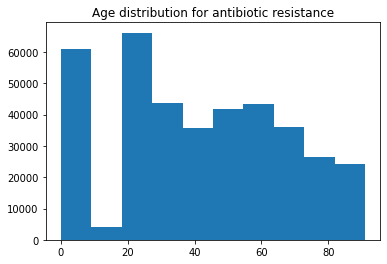

In [ ]:
# histogram of total_bills
plt.hist(df['anchor_age'])
plt.title("Age distribution for antibiotic resistance")
# Adding the legends
plt.show()

# 2. Bar plot

In [ ]:
# prepare data
df_v = df.copy()
df_v['gender'].replace([0,1],['Female','Male'],inplace=True)

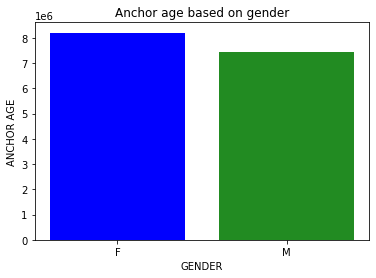

In [ ]:
df_vis = df.groupby('gender')['anchor_age'].sum().to_frame().reset_index()
#Creating the column plot
plt.bar(df_vis['gender'],df_vis['anchor_age'],color = ['#0000FF','#228B22','#800000'])
#Adding the aesthetics
plt.title('Anchor age based on gender')
plt.xlabel('GENDER')
plt.ylabel('ANCHOR AGE')
#Show the plot
plt.show()

# 3. Heatmap

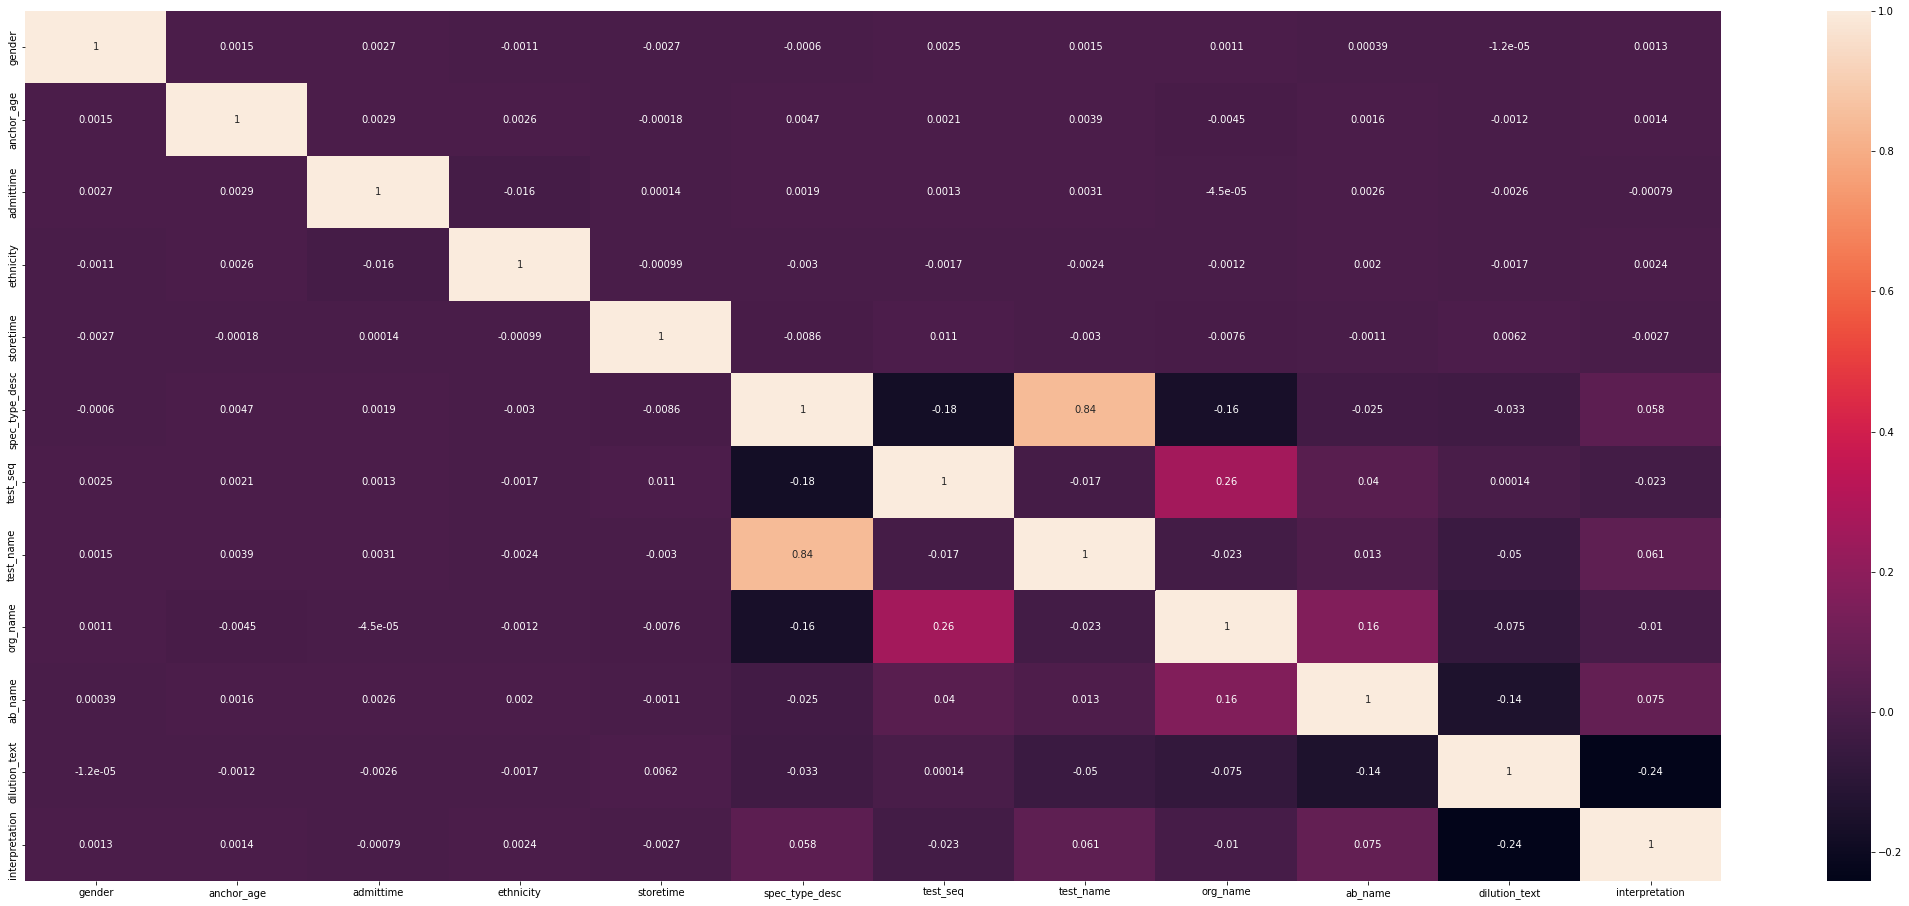

In [ ]:
heatmap_data = df.copy()
# change to numeric
heatmap_data = heatmap_data.astype('category')
wd_column = heatmap_data.select_dtypes(['category']).columns
heatmap_data[wd_column] = heatmap_data[wd_column].apply(lambda x: x.cat.codes)
plt.figure(figsize = (38,16))
sns.heatmap(heatmap_data.corr(), annot = True)
plt.savefig('heatmap.png')
plt.show()